# 作業目標:

    使用CIFAR100, 數據集變大的影響
    
    
# 作業重點:¶

   了解 CIFAR100 跟 CIFAR10 數據及差異


In [1]:
import numpy
from keras.datasets import cifar100
import numpy as np
np.random.seed(100)

Using TensorFlow backend.


# 資料準備

In [8]:
# 'fine' label is mean the class to which it belongs
# 'coarse'label is mean the superclass to which it belongs
(x_train, y_train),(x_test, y_test) = cifar100.load_data(label_mode='coarse')

In [3]:
print('train:', len(x_train))
print('test:', len(x_test))

train: 50000
test: 10000


In [5]:
# 查詢檔案維度資訊
x_train.shape

(50000, 32, 32, 3)

In [6]:
# 查詢檔案維度資訊
y_train.shape

(50000, 1)

In [12]:
# 針對物件圖像數據集的超類別編列字典
label_dict = {0:'aquatic mammals', 1:'fish', 2:'flowers', 3:'food containers', 4:'fruit and vegetables',
                   5:'household electrical devices', 6:'household furniture', 7:'insects', 8:'large carnivores',
                   9:'large man-made outdoor things', 10:'large natural outdoor scenes',
                   11:'large omnivores and herbivores', 12:'medium-sized mammals', 13:'non-insect invertebrates',
                   14:'people', 15:'reptiles', 16:'small mammals', 17:'trees', 18:'vehicles 1', 19:'vehicles 2'}

In [21]:
#導入影像列印模組
import matplotlib.pyplot as plt

#宣告一個影像標記的函數
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=20):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>35: num=35 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')
                
        title=str(i)+','+label_dict[labels[i][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[i]]
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

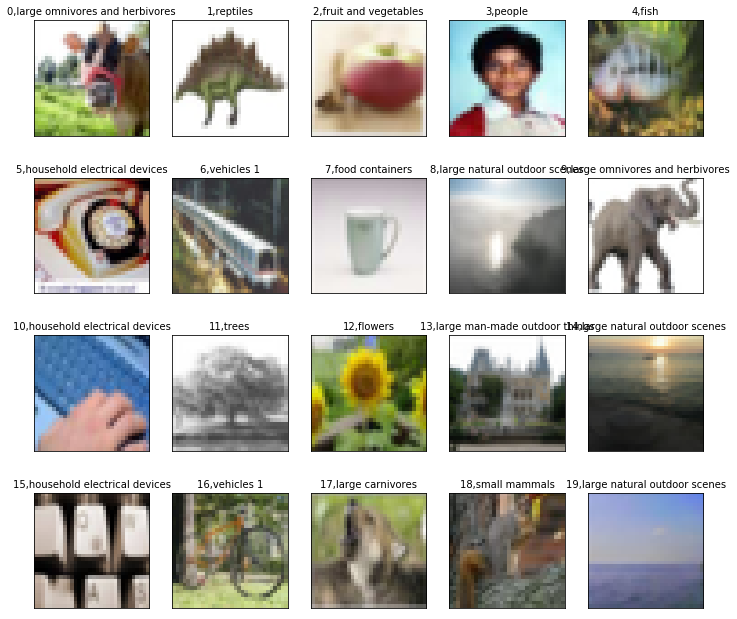

In [22]:
#針對不同的影像作標記

plot_images_labels_prediction(x_train,y_train,[],0)

In [25]:
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_test: (10000, 32, 32, 3)
y_test: (10000, 1)


# Image normalize 

In [26]:
x_train[0][0][0]

array([255, 255, 255], dtype=uint8)

In [27]:
x_train_normal = x_train.astype('float32')/255.0
x_test_normal = x_test.astype('float32')/255.0

In [28]:
x_train_normal[0][0][0]

array([1., 1., 1.], dtype=float32)

# 轉換label 為OneHot Encoding

In [29]:
y_train.shape

(50000, 1)

In [30]:
y_train[:5]

array([[11],
       [15],
       [ 4],
       [14],
       [ 1]])

In [31]:
from keras.utils import np_utils
y_train_onehot = np_utils.to_categorical(y_train)
y_test_onehot = np_utils.to_categorical(y_test)

In [32]:
y_train_onehot.shape

(50000, 20)

In [33]:
y_train_onehot[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)